In [1]:
import sys
import os
# Add the scripts directory to the sys.path
scripts_path = os.path.abspath('../scripts')
sys.path.append(scripts_path)
import data_preprocessing as dp

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = dp.load_and_preprocess_data('../data/lung_cancer.csv')

In [3]:
#Inspect the data 
print(df.head())
print(df.info())

   GENDER  AGE  SMOKING  YELLOW FINGERS  ANXIETY  PEER PRESSURE  \
0       1   69        0               1        1              0   
1       1   74        1               0        0              0   
2       0   59        0               0        0              1   
3       1   63        1               1        1              0   
4       0   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0        1        0         1                  1         1   
1                1        1        1         0                  0         0   
2                0        1        0         1                  0         1   
3                0        0        0         0                  1         0   
4                0        0        0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG CANCER  
0                    1                      1    

In [4]:
df = pd.DataFrame(df)

In [5]:
# Preprocessing- Drop 'LUNG CANCER' column for clustering and scale the data
X = df.drop(columns=["LUNG CANCER"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale features to have mean=0 and variance=1

In [6]:
#Compute the linkage matrix using 'ward' method (minimizes variance within clusters)
Z = linkage(X_scaled, method='ward')  


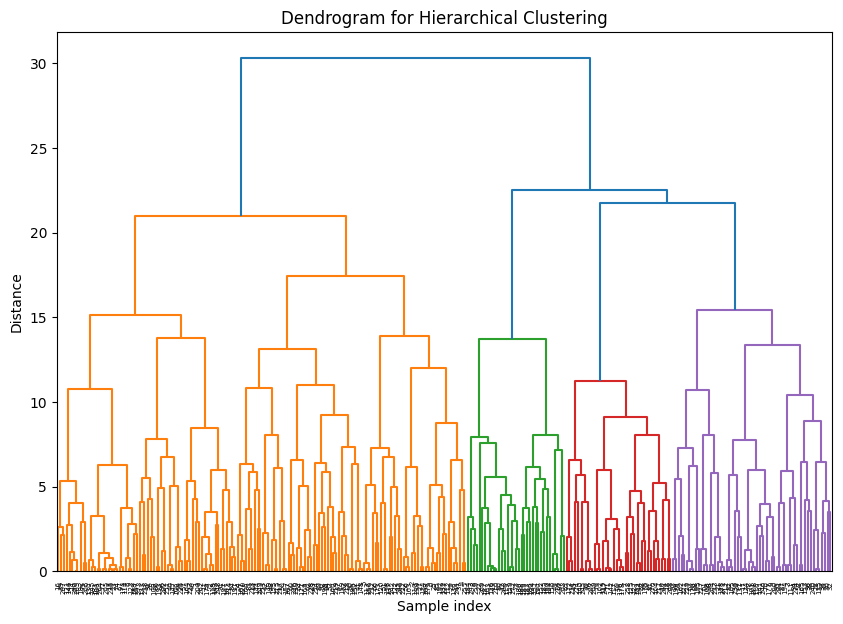

In [7]:
#Plot the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

In [8]:
# Number of clusters from the dendrogram
num_clusters = 5

In [9]:
# Hierarchical clustering with the chosen number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
df['cluster'] = agg_clustering.fit_predict(X_scaled)

In [10]:
# Print the cluster distribution
print("Cluster distribution:\n", df['cluster'].value_counts())

Cluster distribution:
 cluster
0    82
4    64
1    57
3    38
2    35
Name: count, dtype: int64


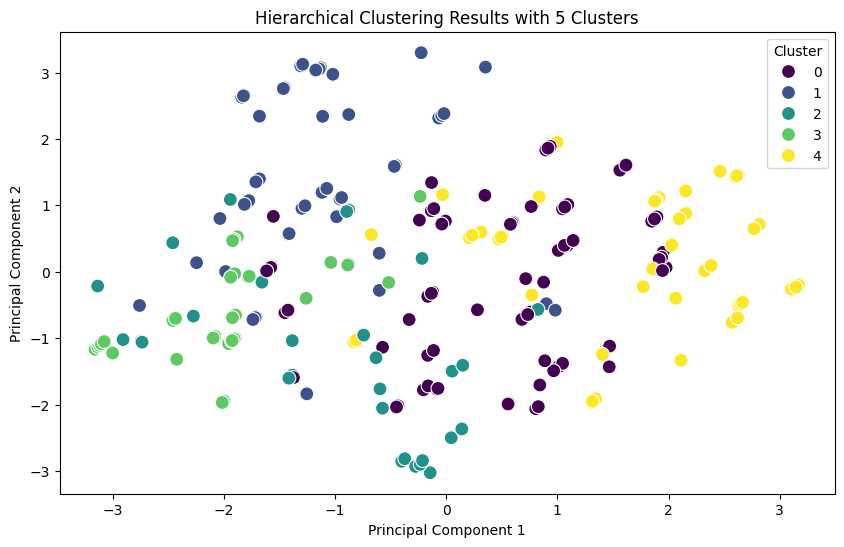

In [11]:
#Vizualise the clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette="viridis", s=100, marker='o')
plt.title(f"Hierarchical Clustering Results with {num_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc="upper right")
plt.show()

In [12]:
# Review cluster centers
cluster_centers = df.groupby('cluster').mean()
print("\nCluster Centers (Mean Feature Values):\n", cluster_centers)


Cluster Centers (Mean Feature Values):
            GENDER        AGE   SMOKING  YELLOW FINGERS   ANXIETY  \
cluster                                                            
0        0.439024  62.695122  0.231707        0.560976  0.243902   
1        0.578947  60.929825  0.491228        0.929825  0.894737   
2        0.314286  62.428571  0.657143        0.228571  0.371429   
3        0.131579  65.631579  0.894737        1.000000  0.973684   
4        0.890625  63.593750  0.718750        0.218750  0.250000   

         PEER PRESSURE  CHRONIC DISEASE   FATIGUE   ALLERGY  WHEEZING  \
cluster                                                                 
0             0.670732         0.536585  0.865854  0.609756  0.829268   
1             0.491228         0.596491  0.140351  0.508772  0.473684   
2             0.457143         0.657143  0.628571  0.114286  0.000000   
3             1.000000         0.500000  1.000000  0.289474  0.526316   
4             0.046875         0.375000  0.6

In [13]:
#Key Insights

#Cluster 0 -High lung cancer rate (91%). Respiratory issues (wheezing, coughing, shortness of breath), fatigue and chronic disease.
#Moderate alcohol consumption and peer pressure. Moderate allergies.
#Smoking is not as high compared to other clusters but still notable.

#CLuster 1 - High lung cancer rate (86%). High anxiety and high yellow fingers, difficulty swallowing anf chest pain.
#Moderate levels of wheezing, and alcohol consumption. Moderate allergies.
#Relatively low fatigue and shortness of breath.

#Cluster 2 - Lower lung cancer rate (43%) compared to other clusters. More smokers (66%), but lower yellow fingers, ie less visible signs of smoking-related damage.
#Moderate anxiety and fatigue
#Low alcohol consumption, respiratory symptoms like wheezing and coughing, and very low chest pain. Low allergies.
#No swallowing difficulty or wheezing

#CLuster 3 - 100% lung cancer rate. Very high levels across the board smoking rates, yellow fingers,shortness of breath
# coughing, swallowing difficulty, anxiety and fatigue.
#Surprisingly low allergies. 


#CLuster 4 -High lung cancer rate (94%). High alcohol consumption and smoking rates. Wheezing, coughing, shortness of breath, and chest pain are high.
#Moderate fatigue
#Low anxiety, yellow fingers, difficulty swallowing, and peer-pressure.

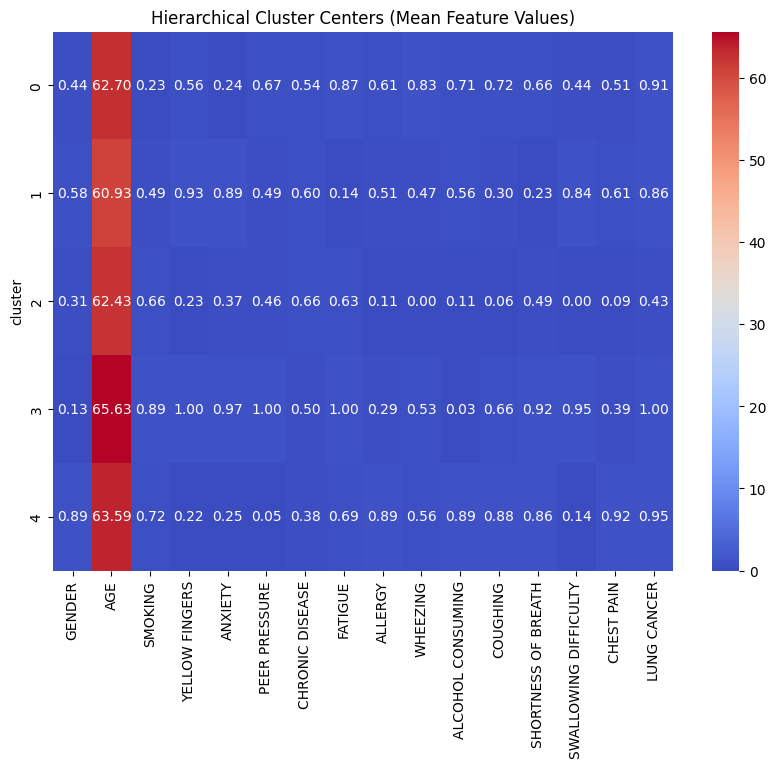

In [14]:
plt.figure(figsize=(10, 7))
sns.heatmap(cluster_centers, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Hierarchical Cluster Centers (Mean Feature Values)")
plt.show()

In [15]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.1175


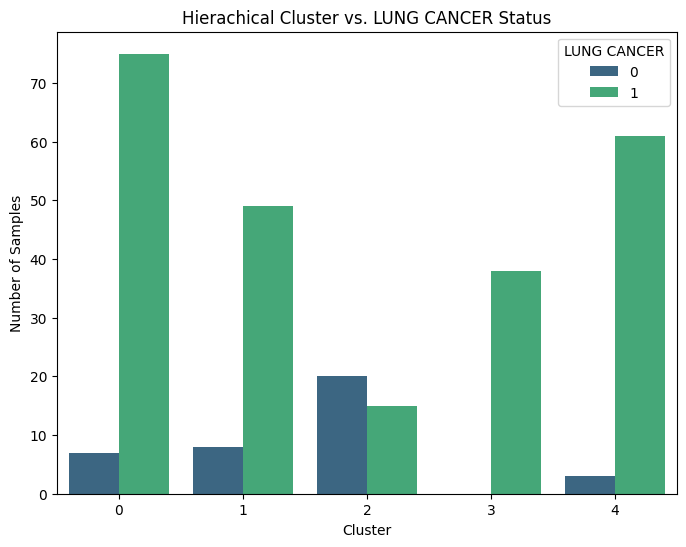

In [17]:
# Compare clusters with 'LUNG CANCER' status
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', hue='LUNG CANCER', data=df, palette='viridis')
plt.title("Hierachical Cluster vs. LUNG CANCER Status")
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.legend(title='LUNG CANCER', loc='upper right')
plt.show()